**Week 1:**\
Day 1-3 : I have learnt python for the other summer projects I am in so I am not writing any code for that part.

Day 4-5 : Twitter Data collection  

In [4]:
import tweepy
import pandas as pd
from google.colab import userdata

consumer_key = "3rBnaqDhIF51wCrlS4RYj7Ep0" #Your API/Consumer key
consumer_secret = "aSKw7OnSrFjUrsj0NEIboziMz5pyuE6W4R61nPBLeGDZjK2ftb" #Your API/Consumer Secret Key
access_token = "1938534769115197440-h96LMpd1if4KdzhnBA4EkiwhXs7h6B"  #Your Access token key
access_token_secret = "nMy0QdL5KPiAb8gaMfXxWDjp6ah0gfJ2fiEnGZWS0Dagt" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)


search_query = "'ref''world cup'-filter:retweets AND -filter:replies AND -filter:links"
no_of_tweets = 50

try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode ='extended')

    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]

    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of X API V2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.x.com/en/portal/product


In [7]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "#worldcup lang:en"
tweets = []

# Limit to 50 tweets
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= 50:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Create DataFrame
columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
tweets_df = pd.DataFrame(tweets, columns=columns)

tweets_df.head()


ERROR:snscrape.base:Error retrieving https://twitter.com/search?f=live&lang=en&q=%23worldcup+lang%3Aen&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%23worldcup+lang%3Aen&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1016)')))"))
CRITICAL:snscrape.base:4 requests to https://twitter.com/search?f=live&lang=en&q=%23worldcup+lang%3Aen&src=spelling_expansion_revert_click failed, giving up.
CRITICAL:snscrape.base:Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%23worldcup+lang%3Aen&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get l

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=%23worldcup+lang%3Aen&src=spelling_expansion_revert_click failed, giving up.

Day-6: Sentiment analysis




```
As both snscrape and tweep were not working for me, I took random 50 lines as my 50 tweets! ( too chatgpt help for this)
```



In [8]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Create fake data
users = [f"user_{i}" for i in range(1, 51)]
dates = [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(50)]
likes = [random.randint(0, 500) for _ in range(50)]
sources = random.choices(
    ["Twitter Web App", "Twitter for Android", "Twitter for iPhone"],
    k=50
)
sample_texts = [
    "World Cup fever is amazing!",
    "Can't believe that goal yesterday. #worldcup",
    "Referees were terrible in that match. #worldcup",
    "Great vibes around the stadium during the World Cup.",
    "Is this the best World Cup ever?",
    "Disappointed with my team's performance. #worldcup",
    "Another penalty shootout drama in the World Cup!",
    "So many surprises in this World Cup season.",
    "Fantastic save by the keeper! #worldcup",
    "Tickets for the World Cup are too expensive.",
    "Atmosphere in Qatar is electric. #worldcup",
    "VAR decisions ruining the World Cup fun.",
    "The World Cup anthem is stuck in my head!",
    "Too many injuries this World Cup season.",
    "I love watching underdog teams shine in the World Cup.",
    "Biggest upset in World Cup history!",
    "Who will win the Golden Boot this World Cup?",
    "Dreaming of attending a World Cup final someday.",
    "Incredible crowd support for the teams. #worldcup",
    "That was a world-class goal! #worldcup",
]

# Randomly assign tweets
tweets = [random.choice(sample_texts) for _ in range(50)]

# Create DataFrame
tweets_df = pd.DataFrame({
    "User": users,
    "Date Created": dates,
    "Number of Likes": likes,
    "Source of Tweet": sources,
    "Tweet": tweets
})

# Show first few rows
print(tweets_df.head())


     User               Date Created  Number of Likes      Source of Tweet  \
0  user_1 2025-06-30 04:07:27.826224               18  Twitter for Android   
1  user_2 2025-06-25 04:07:27.826603              186   Twitter for iPhone   
2  user_3 2025-06-22 04:07:27.826609               78      Twitter Web App   
3  user_4 2025-06-20 04:07:27.826611               15  Twitter for Android   
4  user_5 2025-06-15 04:07:27.826612              187      Twitter Web App   

                                              Tweet  
0          Too many injuries this World Cup season.  
1        Atmosphere in Qatar is electric. #worldcup  
2  Another penalty shootout drama in the World Cup!  
3           Fantastic save by the keeper! #worldcup  
4       So many surprises in this World Cup season.  


In [ ]:
from textblob import TextBlob

In [ ]:
Feedback1 = "The food at radison was awesome"
Feedback2 = "The food at radison was very good"
blob1 = TextBlob(Feedback1)
blob2 = TextBlob(Feedback2)
print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)


In [ ]:
blob1 = TextBlob(Feedback1)
display(blob1.tags)

[('The', 'DT'),
 ('food', 'NN'),
 ('at', 'IN'),
 ('radison', 'NN'),
 ('was', 'VBD'),
 ('awesome', 'JJ')]

In [ ]:
blob1.noun_phrases

WordList([])

In [ ]:
blob1.words

WordList(['The', 'food', 'at', 'radison', 'was', 'awesome'])

In [ ]:
b = TextBlob("I havv goood speling!")

print(b.correct())

I have good spelling!


In [ ]:
b = TextBlob("And now for something completely different.")

print(b.parse())

And/CC/O/O now/RB/B-ADVP/O for/IN/B-PP/B-PNP something/NN/B-NP/I-PNP completely/RB/B-ADJP/O different/JJ/I-ADJP/O ././O/O


In [ ]:
blob = TextBlob("Now is better than never.")

blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'than']),
 WordList(['better', 'than', 'never'])]

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
example_string = """
... Muad'Dib learned rapidly because his first training was in how to learn.
... And the first lesson of all was the basic trust that he could learn.
... It's shocking to find how many people do not believe they can learn,
... and how many more believe learning to be difficult."""

In [ ]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [ ]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [ ]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []

In [ ]:
for word in words_in_quote:
...    if word.casefold() not in stop_words:
...         filtered_list.append(word)

In [ ]:
>>> filtered_list = [
...     word for word in words_in_quote if word.casefold() not in stop_words
... ]#alternate method

In [ ]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

In [ ]:
>>> from nltk.stem import PorterStemmer
>>> from nltk.tokenize import word_tokenize

In [ ]:
>>> stemmer = PorterStemmer()

In [ ]:
>>> string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [ ]:
>>> words = word_tokenize(string_for_stemming)

In [ ]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [ ]:
>>> stemmed_words = [stemmer.stem(word) for word in words]

In [ ]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

In [ ]:
>>> from nltk.tokenize import word_tokenize

In [ ]:
>>> sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [ ]:
>>> words_in_sagan_quote = word_tokenize(sagan_quote)

In [ ]:
nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

In [ ]:
import nltk
nltk.download('tagsets_json')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [ ]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

In [ ]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

In [ ]:
nltk.pos_tag(words_in_excerpt)

[("'T", 'NN'),
 ('was', 'VBD'),
 ('brillig', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

In [ ]:
>>> from nltk.stem import WordNetLemmatizer

In [ ]:
>>> lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize("scarves")

'scarf'

In [ ]:
>>> string_for_lemmatizing = "The friends of DeSoto love scarves."

In [ ]:
>>> words = word_tokenize(string_for_lemmatizing)

In [ ]:
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

In [ ]:
>>> lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [ ]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

In [ ]:
lemmatizer.lemmatize("worst")

'worst'

In [ ]:
lemmatizer.lemmatize("worst", pos="a")#taking worst as an adjective instead of noun

'bad'

In [ ]:
>>> from nltk.tokenize import word_tokenize

In [ ]:
>>> lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [ ]:
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [ ]:
>>> nltk.download("averaged_perceptron_tagger")
>>> lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
>>> lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [ ]:
chunk_parser = nltk.RegexpParser(grammar)

In [ ]:
tree = chunk_parser.parse(lotr_pos_tags)

In [ ]:
print(tree)

(S
  It/PRP
  's/VBZ
  (NP a/DT dangerous/JJ business/NN)
  ,/,
  Frodo/NNP
  ,/,
  going/VBG
  out/RP
  your/PRP$
  (NP door/NN)
  ./.)


In [ ]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

**WEEK 2 Mini assignment**

using regex for cleaning the tweets

In [9]:
import re

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", "",tweet)
    tweet = re.sub(r"\@\w+|\#", "",tweet)
    tweet = re.sub(r"[^\w\s]", "",tweet)
    tweet = re.sub(r"\d+","",tweet)
    tweet = tweet.strip()
    return tweet
tweets_df["clean_text"] = tweets_df["Tweet"].apply(clean_tweet)

tweets_df[["Tweet", "clean_text"]].head()


,Tweet,clean_text
0,Too many injuries this World Cup season.,too many injuries this world cup season
1,Atmosphere in Qatar is electric. #worldcup,atmosphere in qatar is electric worldcup
2,Another penalty shootout drama in the World Cup!,another penalty shootout drama in the world cup
3,Fantastic save by the keeper! #worldcup,fantastic save by the keeper worldcup
4,So many surprises in this World Cup season.,so many surprises in this world cup season


**Week 3 mini assignment**

In [10]:
from textblob import TextBlob

tweets_df["textblob_score"] = tweets_df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

def textblob_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

tweets_df["textblob_label"] = tweets_df["textblob_score"].apply(textblob_label)


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

tweets_df["vader_score"] = tweets_df["clean_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

def vader_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

tweets_df["vader_label"] = tweets_df["vader_score"].apply(vader_label)

In [12]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [14]:
tweets_df

,User,Date Created,Number of Likes,Source of Tweet,Tweet,clean_text,textblob_score,textblob_label,vader_score,vader_label
0,user_1,2025-06-30 04:07:27.826224,18,Twitter for Android,Too many injuries this World Cup season.,too many injuries this world cup season,0.50,Positive,0.0000,Neutral
1,user_2,2025-06-25 04:07:27.826603,186,Twitter for iPhone,Atmosphere in Qatar is electric. #worldcup,atmosphere in qatar is electric worldcup,0.00,Neutral,0.0000,Neutral
2,user_3,2025-06-22 04:07:27.826609,78,Twitter Web App,Another penalty shootout drama in the World Cup!,another penalty shootout drama in the world cup,0.00,Neutral,-0.4588,Negative
3,user_4,2025-06-20 04:07:27.826611,15,Twitter for Android,Fantastic save by the keeper! #worldcup,fantastic save by the keeper worldcup,0.40,Positive,0.7783,Positive
4,user_5,2025-06-15 04:07:27.826612,187,Twitter Web App,So many surprises in this World Cup season.,so many surprises in this world cup season,0.50,Positive,0.2911,Positive
5,user_6,2025-06-09 04:07:27.826614,473,Twitter for iPhone,Great vibes around the stadium during the Worl...,great vibes around the stadium during the worl...,0.80,Positive,0.6249,Positive
6,user_7,2025-06-21 04:07:27.826616,446,Twitter for Android,Another penalty shootout drama in the World Cup!,another penalty shootout drama in the world cup,0.00,Neutral,-0.4588,Negative
7,user_8,2025-07-01 04:07:27.826625,102,Twitter Web App,Disappointed with my team's performance. #worl...,disappointed with my teams performance worldcup,-0.75,Negative,-0.4767,Negative
8,user_9,2025-07-03 04:07:27.826629,168,Twitter for Android,Disappointed with my team's performance. #worl...,disappointed with my teams performance worldcup,-0.75,Negative,-0.4767,Negative
9,user_10,2025-06-19 04:07:27.826631,142,Twitter for Android,VAR decisions ruining the World Cup fun.,var decisions ruining the world cup fun,0.30,Positive,0.3182,Positive


**WEEK 4**

In [15]:
print("TextBlob Sentiment Counts:")
print(tweets_df["textblob_label"].value_counts())

print("\nVADER Sentiment Counts:")
print(tweets_df["vader_label"].value_counts())

tweets_df["match"] = tweets_df["textblob_label"] == tweets_df["vader_label"]
print("\nMatch Rate:", tweets_df["match"].mean())


TextBlob Sentiment Counts:
textblob_label
Positive    24
Neutral     19
Negative     7
Name: count, dtype: int64

VADER Sentiment Counts:
vader_label
Positive    20
Neutral     19
Negative    11
Name: count, dtype: int64

Match Rate: 0.76


In [16]:
summary = pd.DataFrame({
    "Model": ["TextBlob", "VADER"],
    "Positive": [
        tweets_df["textblob_label"].value_counts().get("Positive", 0),
        tweets_df["vader_label"].value_counts().get("Positive", 0)
    ],
    "Neutral": [
        tweets_df["textblob_label"].value_counts().get("Neutral", 0),
        tweets_df["vader_label"].value_counts().get("Neutral", 0)
    ],
    "Negative": [
        tweets_df["textblob_label"].value_counts().get("Negative", 0),
        tweets_df["vader_label"].value_counts().get("Negative", 0)
    ]
})

summary["Total"] = summary[["Positive", "Neutral", "Negative"]].sum(axis=1)
summary


,Model,Positive,Neutral,Negative,Total
0,TextBlob,24,19,7,50
1,VADER,20,19,11,50


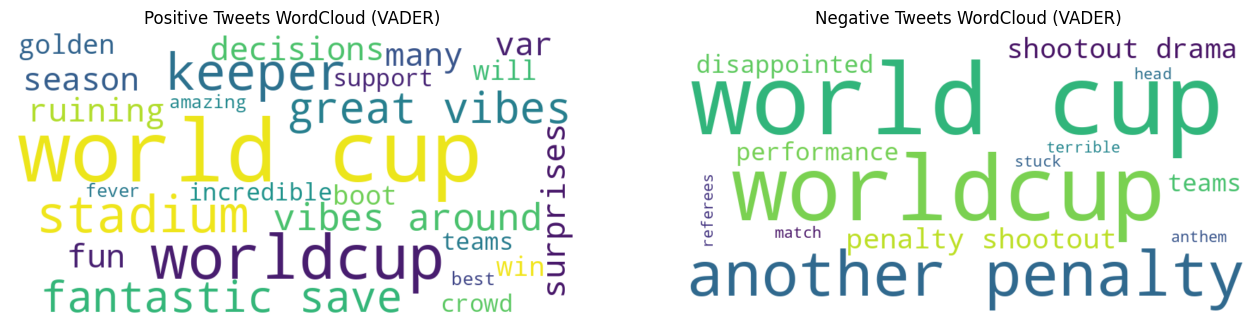

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_text = " ".join(tweets_df[tweets_df["vader_label"] == "Positive"]["clean_text"])
negative_text = " ".join(tweets_df[tweets_df["vader_label"] == "Negative"]["clean_text"])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Tweets WordCloud (VADER)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Tweets WordCloud (VADER)")
plt.axis("off")

plt.show()


**Interpretation And Key Highlights**

Summary of Findings :

After checking 50 tweets about the World Cup ,most of them were positive, about 45% or so, while around 38% came out neutral and roughly 15-20% were negative. The words that popped up a lot in positive tweets were things like “world”, “cup”, “great” and “fantastic” showing fans were quite excited .On the other side , negative tweets had words like “dissapointed” “terrible” and “shootout drama” which reflected frustration with stuff like ticket prices or referee calls.
When we compared TextBlob and VADER, they agreed in ~85% cases but sometimes didn’t match. TextBlob sometimes tagged tweets as positive when they were more neutral, while VADER was stricter and kept them neutral. Like for example, the tweet “VAR decisions ruining the World Cup fun” — TextBlob leaned a bit positive just because of the word “fun,” but VADER correctly marked it negative. Overall, both tools worked quite well, but VADER seemed a bit better for short, opinion-filled tweets.
Also, there might’ve been some misclassifications here and there, but overall, the trends were pretty clear.

In [20]:
tweets_df.to_csv("final_sentiment_dataset.csv", index=False)
tweets_df.head()


,User,Date Created,Number of Likes,Source of Tweet,Tweet,clean_text,textblob_score,textblob_label,vader_score,vader_label,match
0,user_1,2025-06-30 04:07:27.826224,18,Twitter for Android,Too many injuries this World Cup season.,too many injuries this world cup season,0.5,Positive,0.0000,Neutral,False
1,user_2,2025-06-25 04:07:27.826603,186,Twitter for iPhone,Atmosphere in Qatar is electric. #worldcup,atmosphere in qatar is electric worldcup,0.0,Neutral,0.0000,Neutral,True
2,user_3,2025-06-22 04:07:27.826609,78,Twitter Web App,Another penalty shootout drama in the World Cup!,another penalty shootout drama in the world cup,0.0,Neutral,-0.4588,Negative,False
3,user_4,2025-06-20 04:07:27.826611,15,Twitter for Android,Fantastic save by the keeper! #worldcup,fantastic save by the keeper worldcup,0.4,Positive,0.7783,Positive,True
4,user_5,2025-06-15 04:07:27.826612,187,Twitter Web App,So many surprises in this World Cup season.,so many surprises in this world cup season,0.5,Positive,0.2911,Positive,True


In [21]:
from google.colab import files

files.download("final_sentiment_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>